# <font color='red'> Bike Sharing Demand Prediction
    
### Author: Ankit Raina
### Date of Creation: March 13, 2020

### Importing Required Packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import itertools

### Reading the data set

In [2]:
data = pd.read_csv('hour.csv')

In [3]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
data.shape

(17379, 17)

In [5]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### Data Cleaning

##### We have the feature dteday which itself is not very useful, but information it encapsulates can provide us some insights.
##### We already have features like yr, month, hour, week day, etc., so retaining dteday won't be very helpful.
##### Also, instant is not a necessay variable, so dropping both instant and dteday.

In [6]:
data  = data.drop(["instant", "dteday"],axis=1)

In [7]:
data.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Determining if there any missing values

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  casual      17379 non-null  int64  
 13  registered  17379 non-null  int64  
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11)
memory usage: 2.0 MB


We can see that none of the features have NULL values

#### Setting categorical variables as category type and renaming the labels for the categories

From the data dictionary, it is known that season, yr, mnth, hr, holiday, weekday, workingday, weathersit are categorical variables 

In [9]:
categorical_variables = ["season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit"]

In [10]:
for var in categorical_variables:
    data[var] = data[var].astype('category')

#### Season

1:winter, 2:spring, 3:summer, 4:fall

In [11]:
season_labels = ["Winter", "Spring", "Summer", "Fall"]
data["season"] = data["season"].cat.rename_categories(season_labels)

#### Year

0: 2011, 1:2012

In [12]:
year_labels = ["2011", "2012"]
data["yr"] = data["yr"].cat.rename_categories(year_labels)

#### Month

1: Jan, 2: Feb, 3: Mar, 4: Apr, 5:May, 6: Jun,
7: Jul, 8: Aug, 9: Sep, 10: Oct, 11: Nov, 12: Dec

In [13]:
month_labels = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
data["mnth"] = data["mnth"].cat.rename_categories(month_labels)

#### Day of the Week

0: Sunday, 1: Monday, 2: Tuesday, 3: Wednesday, 4: Thursday, 5: Friday, 6: Saturday

In [14]:
week_labels = ["Sun","Mon","Tue","Wed","Thu","Fri","Sat"]
data["weekday"] = data["weekday"].cat.rename_categories(week_labels)

### Exploratory Data Analysis

### Univariate Analysis

#### Let us explore the distribution of all the categorical variables

#### Season

C:\Users\nkit0\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\nkit0\Anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


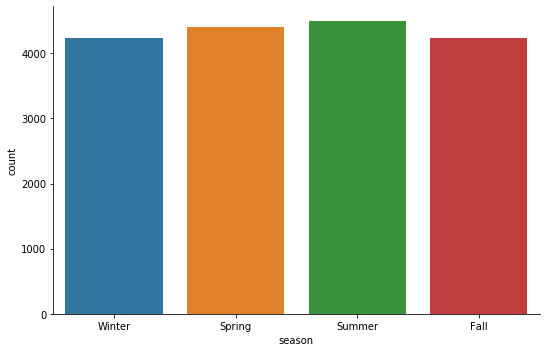

In [15]:
sn.factorplot(x="season",data=data,kind='count',size=5,aspect=1.5)

#### Year

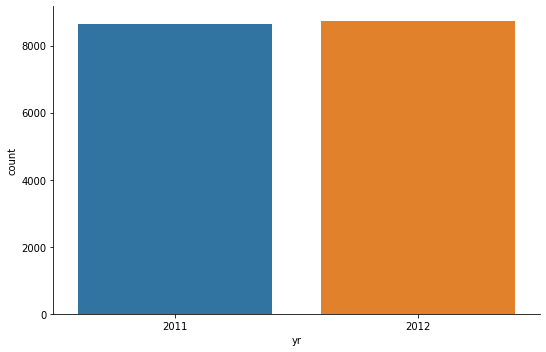

In [16]:
sn.factorplot(x="yr",data=data,kind='count',size=5,aspect=1.5)

#### Year

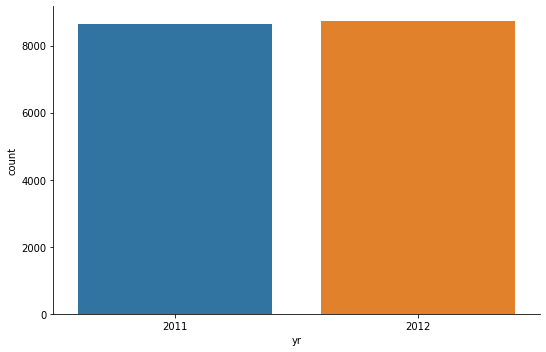

In [17]:
sn.factorplot(x="yr",data=data,kind='count',size=5,aspect=1.5)

#### Month

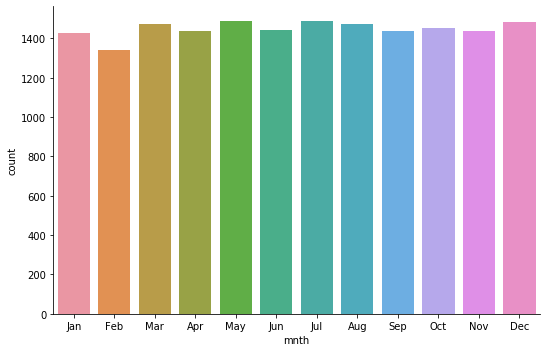

In [18]:
sn.factorplot(x="mnth",data=data,kind='count',size=5,aspect=1.5)

#### Hour

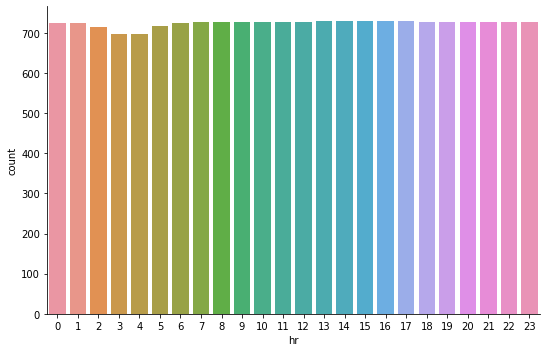

In [19]:
sn.factorplot(x="hr",data=data,kind='count',size=5,aspect=1.5)

#### Holiday

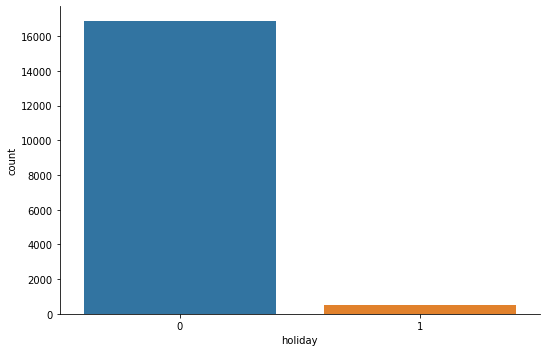

In [20]:
sn.factorplot(x="holiday",data=data,kind='count',size=5,aspect=1.5)

#### Days of the Week

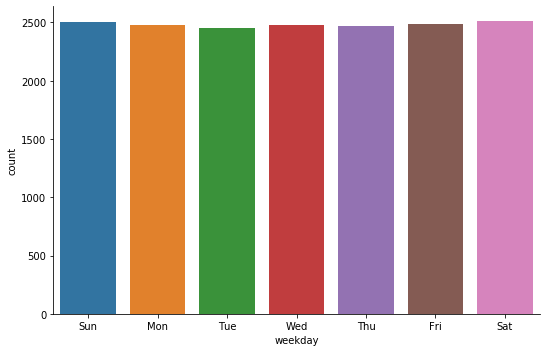

In [21]:
sn.factorplot(x="weekday",data=data,kind='count',size=5,aspect=1.5)

#### WorkingDay

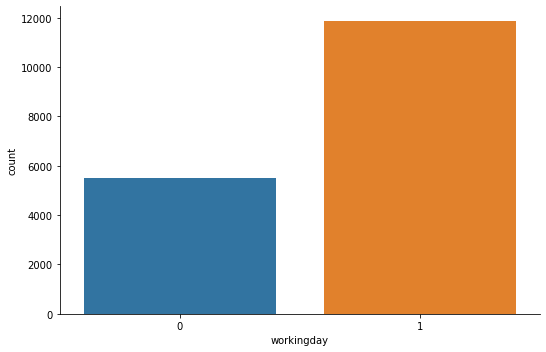

In [22]:
sn.factorplot(x="workingday",data=data,kind='count',size=5,aspect=1.5)

#### Weather Situation

 weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

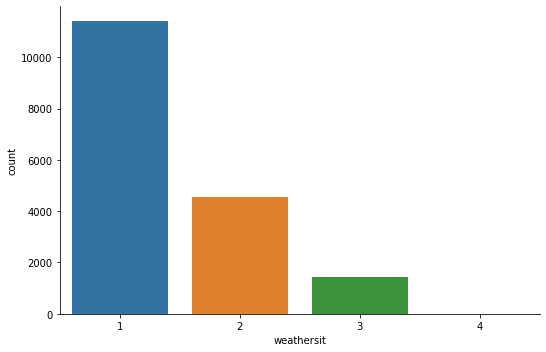

In [23]:
sn.factorplot(x="weathersit",data=data,kind='count',size=5,aspect=1.5)

#### Let us explore the distributions of numerical variables

temp, atemp, hum, windspeed are numerical variables

In [24]:
numerical_variables = ["temp", "atemp", "hum", "windspeed"]

Let us explore the distribution of all the numerical variables

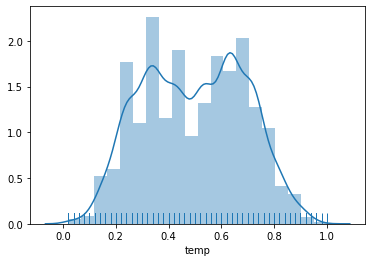

In [25]:
sn.distplot(data["temp"], kde=True, rug=True, bins=20)

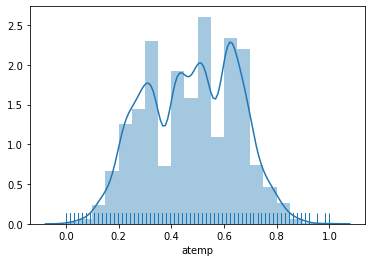

In [26]:
sn.distplot(data["atemp"], kde=True, rug=True, bins=20)

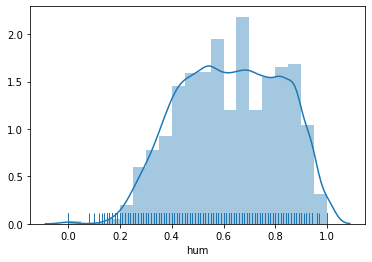

In [27]:
sn.distplot(data["hum"], kde=True, rug=True, bins=20)

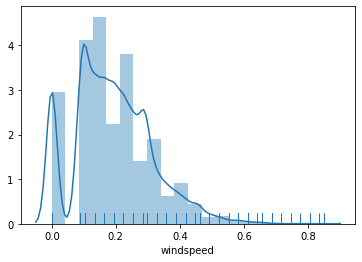

In [28]:
sn.distplot(data["windspeed"], kde=True, rug=True, bins=20)

### Multivariate Analysis

#### Now let us look at the different categorical variables with respect to the target variable cnt 

### Average Count By Days of the Week (cnt Vs weekday)

[Text(0, 0.5, 'Average Count'),
 Text(0.5, 0, 'Days of the Week'),
 Text(0.5, 1.0, 'Average Count By Days of the Week')]

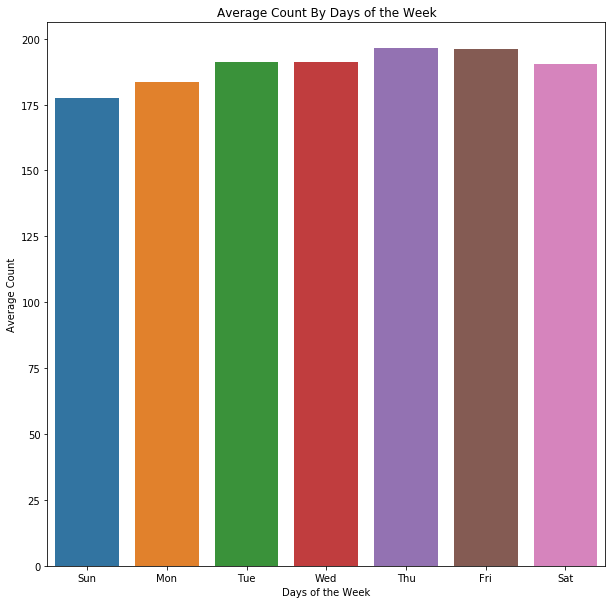

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)

# Average Count per Day of the Week (cnt Vs weekday)
week_aggregated_data = pd.DataFrame(data.groupby("weekday")["cnt"].mean()).reset_index().sort_values(by="cnt",ascending=False)

sn.barplot(data=week_aggregated_data,x="weekday",y="cnt",ax=ax)
ax.set(xlabel='Days of the Week', ylabel='Average Count',title="Average Count By Days of the Week")

### Average Count By Month (cnt Vs mnth)

[Text(0, 0.5, 'Average Count'),
 Text(0.5, 0, 'Month'),
 Text(0.5, 1.0, 'Average Count By Month')]

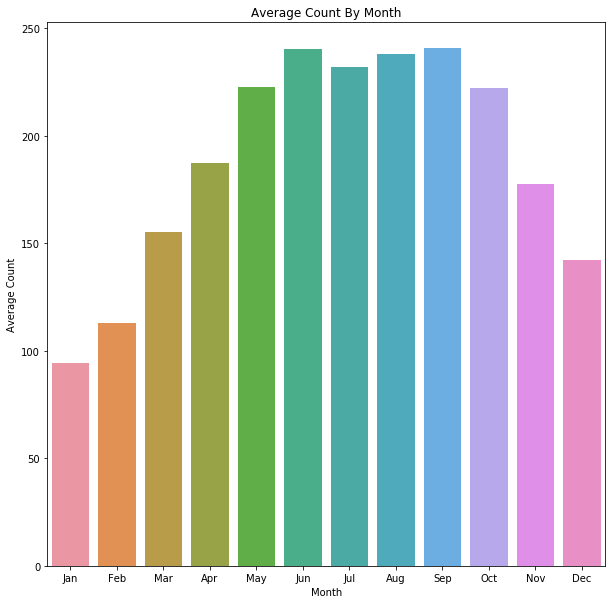

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)

# Average Count per Month (cnt Vs mnth)
month_aggregated_data = pd.DataFrame(data.groupby("mnth")["cnt"].mean()).reset_index().sort_values(by="cnt",ascending=False)

sn.barplot(data=month_aggregated_data,x="mnth",y="cnt",ax=ax)
ax.set(xlabel='Month', ylabel='Average Count',title="Average Count By Month")

### Average Count of Users by Hour across Seasons

[Text(0, 0.5, 'Average Count of Users'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Count of Users By Hour Across Seasons'),
 None]

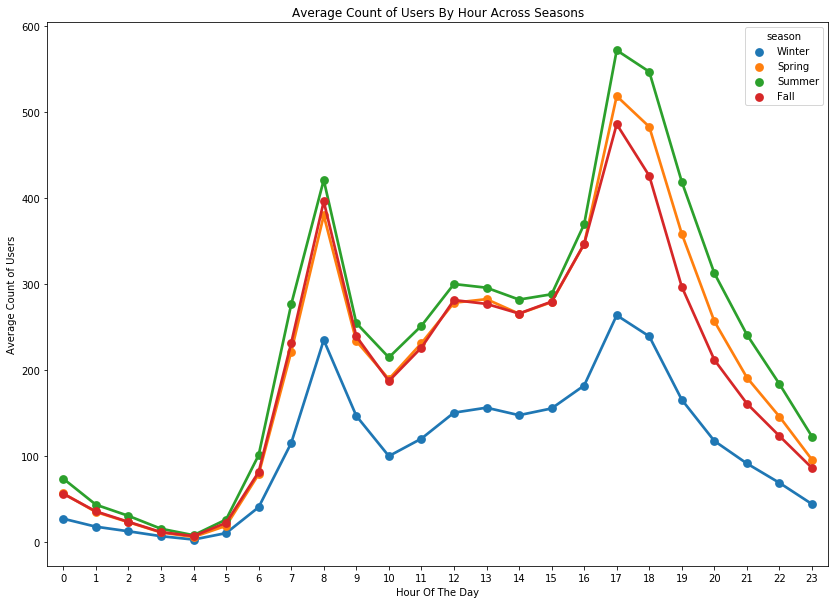

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(14,10)

hours_aggregated_data = pd.DataFrame(data.groupby(["hr","season"],sort=True)["cnt"].mean()).reset_index()

sn.pointplot(x=hours_aggregated_data["hr"], y=hours_aggregated_data["cnt"],hue=hours_aggregated_data["season"], data=hours_aggregated_data, join=True,ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Average Count of Users',title="Average Count of Users By Hour Across Seasons",label='big')

### Average Count of Users by Hour across Days of the Week

[Text(0, 0.5, 'Average Count of Users'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Count of Users By Hour Across Days of the Week'),
 None]

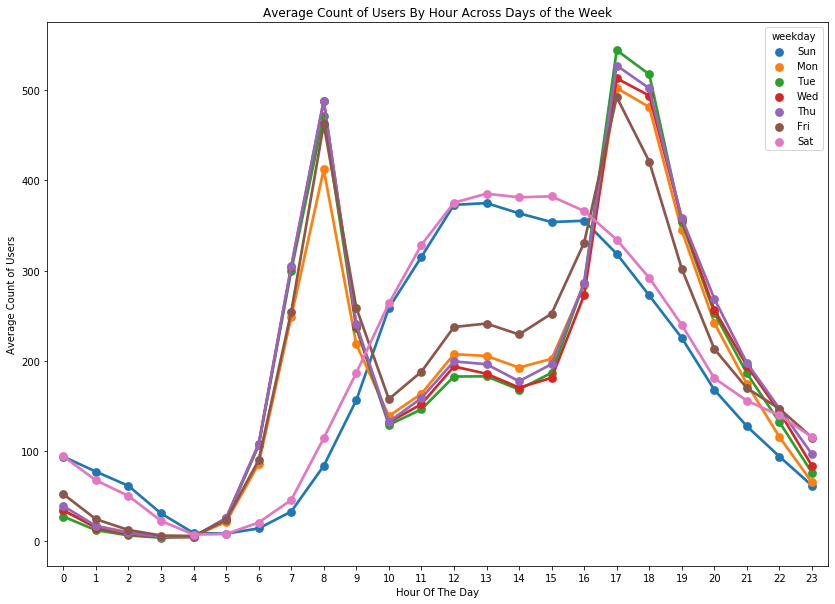

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(14,10)

hours_aggregated_data = pd.DataFrame(data.groupby(["hr","weekday"],sort=True)["cnt"].mean()).reset_index()

sn.pointplot(x=hours_aggregated_data["hr"], y=hours_aggregated_data["cnt"],hue=hours_aggregated_data["weekday"], data=hours_aggregated_data, join=True,ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Average Count of Users',title="Average Count of Users By Hour Across Days of the Week",label='big')

### Average Count of Users by Hour across Holiday(1) / No Holiday (0)  

[Text(0, 0.5, 'Average Count of Users'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Count of Users By Hour Across Holiday(1) / No Holiday (0)'),
 None]

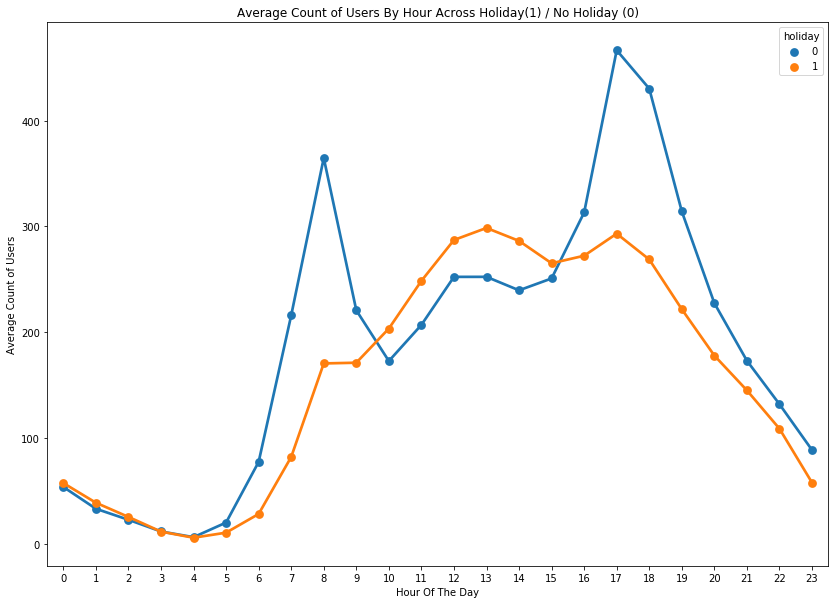

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(14,10)

hours_aggregated_data = pd.DataFrame(data.groupby(["hr","holiday"],sort=True)["cnt"].mean()).reset_index()

sn.pointplot(x=hours_aggregated_data["hr"], y=hours_aggregated_data["cnt"],hue=hours_aggregated_data["holiday"], data=hours_aggregated_data, join=True,ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Average Count of Users',title="Average Count of Users By Hour Across Holiday(1) / No Holiday (0)",label='big')

### Average Count of Users by Hour across Working Day (1) / No Working Day (0)

[Text(0, 0.5, 'Average Count of Users'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Count of Users By Hour Across Working Day (1) / No Working Day (0)'),
 None]

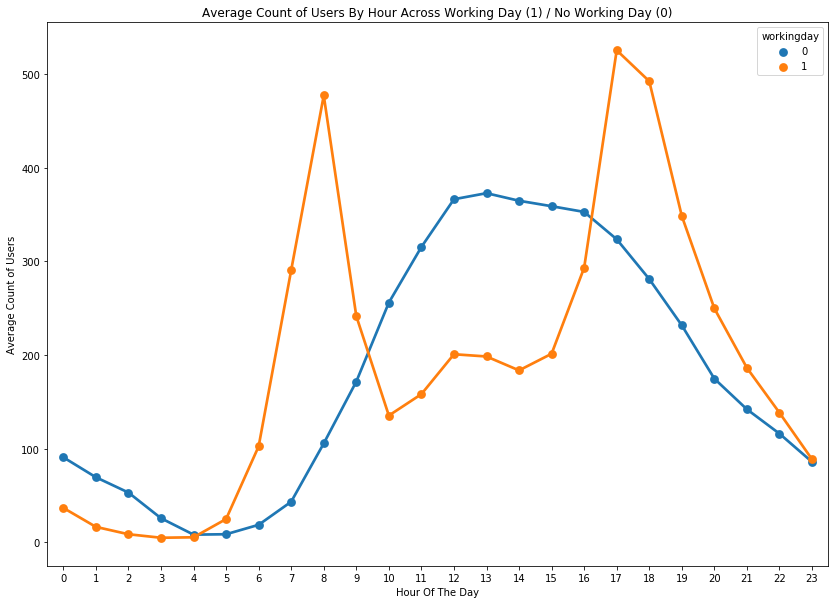

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(14,10)

hours_aggregated_data = pd.DataFrame(data.groupby(["hr","workingday"],sort=True)["cnt"].mean()).reset_index()

sn.pointplot(x=hours_aggregated_data["hr"], y=hours_aggregated_data["cnt"],hue=hours_aggregated_data["workingday"], data=hours_aggregated_data, join=True,ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Average Count of Users',title="Average Count of Users By Hour Across Working Day (1) / No Working Day (0)",label='big')

### Average Count of Users by Hour across Weather Situations

weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

[Text(0, 0.5, 'Average Count of Users'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Count of Users By Hour Across Weather Situations'),
 None]

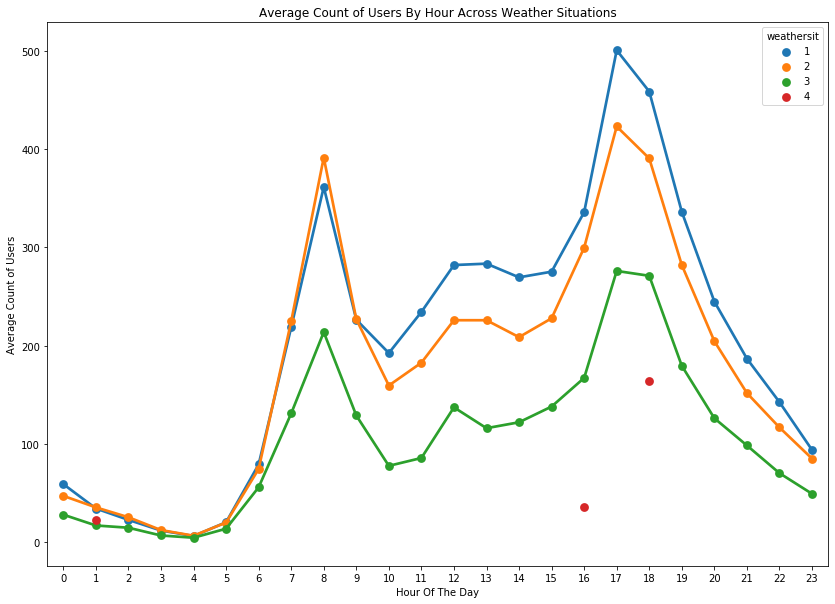

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(14,10)

hours_aggregated_data = pd.DataFrame(data.groupby(["hr","weathersit"],sort=True)["cnt"].mean()).reset_index()

sn.pointplot(x=hours_aggregated_data["hr"], y=hours_aggregated_data["cnt"],hue=hours_aggregated_data["weathersit"], data=hours_aggregated_data, join=True,ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Average Count of Users',title="Average Count of Users By Hour Across Weather Situations",label='big')

### Average Count of Users by Hour across User Types

[Text(0, 0.5, 'Average Count of Users'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Count of Users By Hour Of The Day Across User Type'),
 None]

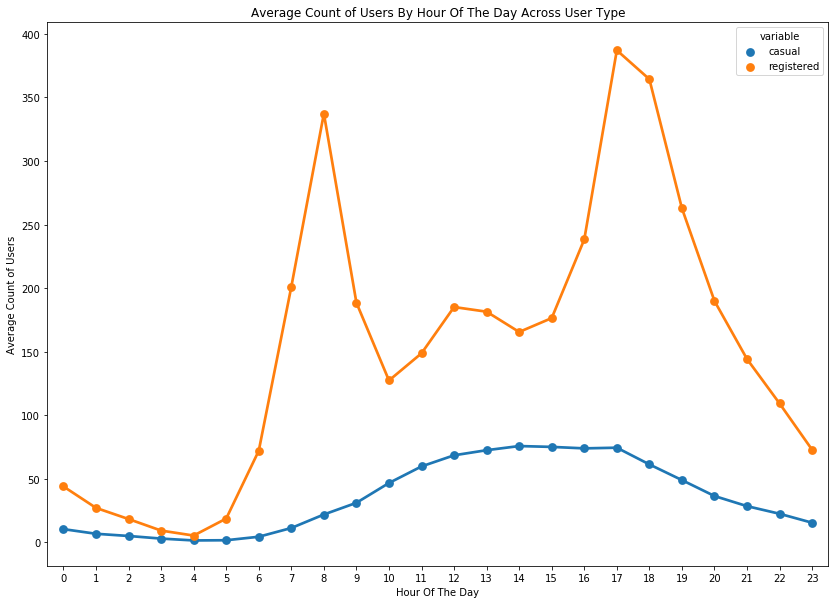

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(14,10)

usr_typ_trnsfm_data = pd.melt(data[["hr","casual","registered"]], id_vars=["hr"], value_vars=["casual", "registered"])
hours_aggregated_data = pd.DataFrame(usr_typ_trnsfm_data.groupby(["hr","variable"],sort=True)["value"].mean()).reset_index()

sn.pointplot(x=hours_aggregated_data["hr"], y=hours_aggregated_data["value"],hue=hours_aggregated_data["variable"],hue_order=["casual","registered"], data=hours_aggregated_data, join=True,ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Average Count of Users',title="Average Count of Users By Hour Of The Day Across User Type",label='big')

#### Now, let us look at the Scatter Plots between the target variable cnt and numerical variables temp, atemp and hum

### Temperature

#### Since the values are normalized, it is difficult to draw clear insights about the relationship between temperature and bike usage

#### We will threfore denormalize the temp variable for analysis purpose

#### We know TMax - TMin = 39 -(-8) = 47 and Normalized Temperature (temp) = (T- TMin)/(TMax - TMin)
#### Therefore, T = 47*temp - 8

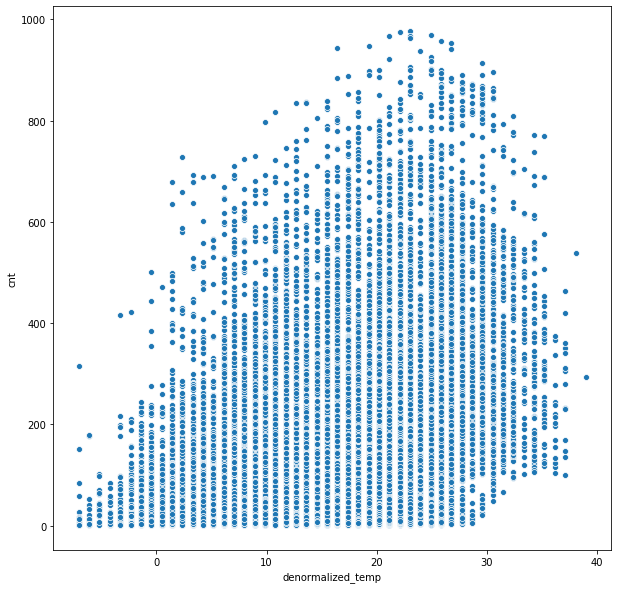

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)

data["denormalized_temp"] = np.subtract(np.multiply(data["temp"], 47), 8)

sn.scatterplot(x="denormalized_temp", y="cnt", data=data, ax=ax)

#### Since the above plot is hard to visualize, we will bin the variable denormalized_temp and see if we see any relationship with usage

C:\Users\nkit0\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


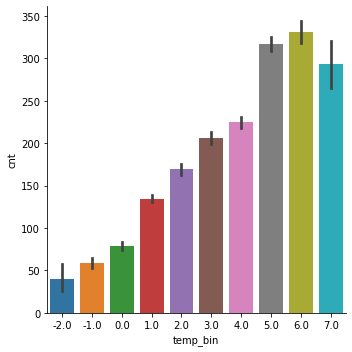

In [38]:
temp_data = data.copy()
temp_data["temp_bin"]= np.floor(temp_data["denormalized_temp"])//5
temp_data["temp_bin"].unique()

sn.factorplot(x="temp_bin",y="cnt",data=temp_data,kind="bar")

#### We can see that bike usage is highest for bins 6 (temperature 30-35 degree Celsius) and 5 (temperature 25-30 degree Celsius)

### Adjusted Temperature (Feels like)

#### Since the values are normalized, it is difficult to draw clear insights about the relationship between temperature and bike usage

#### We will threfore denormalize the atemp variable for analysis purpose

#### We know TMax - TMin = 50 -(-16) = 66 and Normalized Temperature (atemp) = (T- TMin)/(TMax - TMin)
#### Therefore, T = 66*atemp - 16

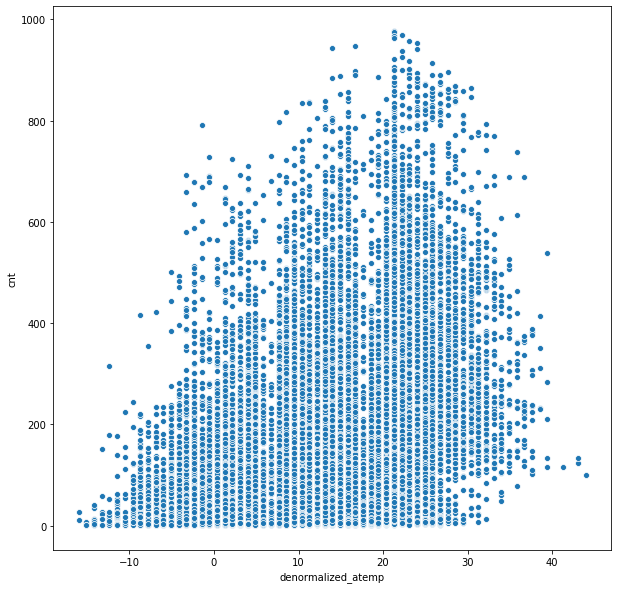

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)

data["denormalized_atemp"] = np.subtract(np.multiply(data["atemp"], 60), 16)

sn.scatterplot(x="denormalized_atemp", y="cnt", data=data, ax=ax)

#### Since the above plot is hard to visualize, we will bin the variable denormalized_atemp and see if we see any relationship with usage

C:\Users\nkit0\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


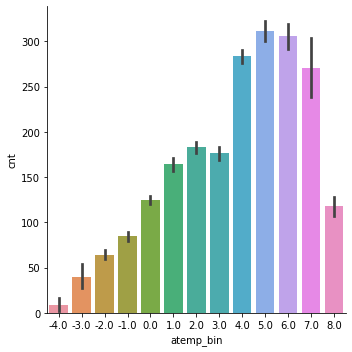

In [40]:
temp_data = data.copy()
temp_data["atemp_bin"]= np.floor(temp_data["denormalized_atemp"])//5
temp_data["atemp_bin"].unique()

sn.factorplot(x="atemp_bin",y="cnt",data=temp_data,kind="bar")

#### We can see that bike usage is highest for bins 5 (adjusted temperature 30-35 degree Celsius) and 6 (adjusted temperature 35-40 degree Celsius)

### Humidity

####  Since the values are normalized, we will obtain the actual score by multiplting by 100

#### Therefore, Denormalized Humidity = hum*100

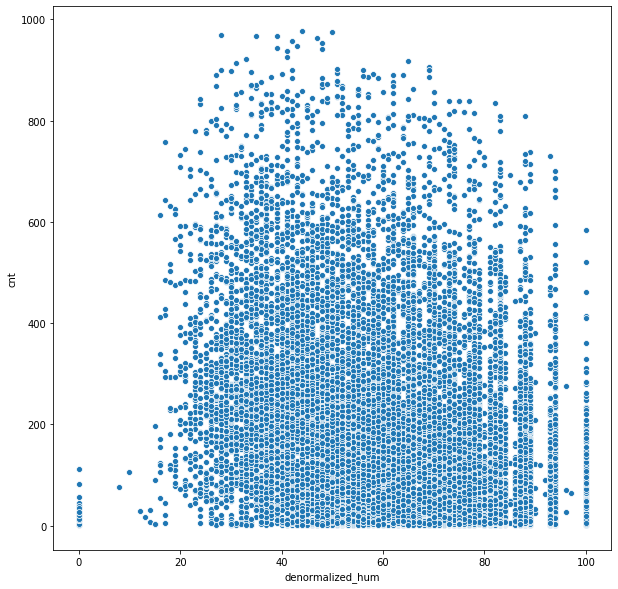

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)

data["denormalized_hum"] = np.multiply(data["hum"], 100)

sn.scatterplot(x="denormalized_hum", y="cnt", data=data, ax=ax)

#### Since the above plot is hard to visualize, we will bin the variable denormalized_hum and see if we see any relationship with usage

C:\Users\nkit0\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


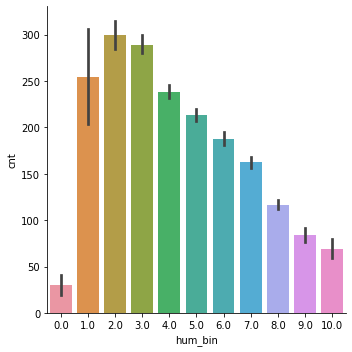

In [42]:
temp_data = data.copy()
temp_data["hum_bin"]= np.floor(temp_data["denormalized_hum"])//10
temp_data["hum_bin"].unique()

sn.factorplot(x="hum_bin",y="cnt",data=temp_data,kind="bar")

#### We see that bike usage is highest when the humidity is between 10% - 30%

### Pearson's Chi-Squared Test of Independence

#### We will now apply Chi-squared test for all combinations of categorical variables to check if the categorical variables are associated with each other

#### We will consider Alpha = 0.01

In [43]:
alpha = 0.01

In [44]:
from itertools import combinations 

all_combinations = itertools.combinations(categorical_variables, 2)

In [45]:
from scipy.stats import chi2_contingency

for comb in all_combinations:
    print(f"{comb[0]} Vs {comb[1]}")
    contingency_table = pd.crosstab(
       data[comb[0]],
       data[comb[1]],
       margins = True)
   
    stat, p, dof, expected = chi2_contingency(contingency_table)
    
    if p <= alpha:
        print(f"{comb[0]} and {comb[1]} are associated with each other")
    else:
        print("No association")
        
    print("\n")
        

season Vs yr
No association


season Vs mnth
season and mnth are associated with each other


season Vs hr
No association


season Vs holiday
season and holiday are associated with each other


season Vs weekday
No association


season Vs workingday
season and workingday are associated with each other


season Vs weathersit
season and weathersit are associated with each other


yr Vs mnth
No association


yr Vs hr
No association


yr Vs holiday
No association


yr Vs weekday
No association


yr Vs workingday
No association


yr Vs weathersit
No association


mnth Vs hr
No association


mnth Vs holiday
mnth and holiday are associated with each other


mnth Vs weekday
No association


mnth Vs workingday
mnth and workingday are associated with each other


mnth Vs weathersit
mnth and weathersit are associated with each other


hr Vs holiday
No association


hr Vs weekday
No association


hr Vs workingday
No association


hr Vs weathersit
hr and weathersit are associated with each other




### Outlier Analysis

#### Now, we will look if there are any outliers for the numerical regressors

#### We will first do a visual analysis using Box Plots

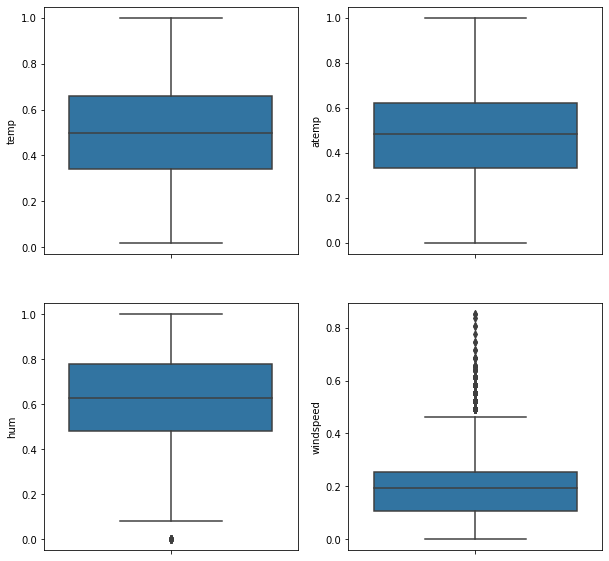

In [46]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10, 10)

sn.boxplot(data=data,x="temp",orient="v",ax=axes[0][0])
sn.boxplot(data=data,x="atemp",orient="v",ax=axes[0][1])
sn.boxplot(data=data,x="hum",orient="v",ax=axes[1][0])
sn.boxplot(data=data,x="windspeed",orient="v",ax=axes[1][1])

#### We see that the variable windspeed has substantial outliers, but this does not seem any error but rather very natural that sometimes we may have very high wind speeds like during storms which occur twice/ thrice every year
#### Therefore, we will not remove the outliers

### Correlation Analysis

#### Now, we will analyze if there is any correlation amongst the numerical variable temp, atemp, hum, windspeed and the target variable cnt

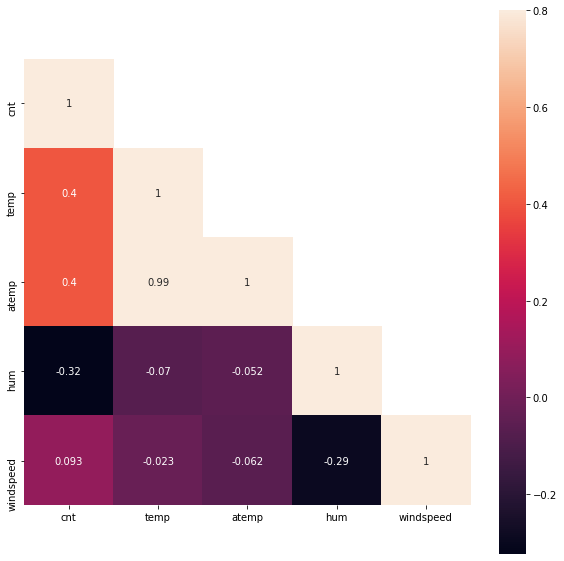

In [47]:
corr_matrix = data[["cnt", "temp", "atemp", "hum", "windspeed", "holiday", "workingday", "weekday"]].corr()
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False

fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sn.heatmap(corr_matrix, mask=mask,vmax=.8, square=True,annot=True)

#### We can see that variables temp and atemp are very highly correlated, so we will retain just hum to avoid multi-collinearity problem

#### Also, variables temp and hum are moderately correlated with the target variable cnt and thus should be added to the model to predict cnt

### Feature Selection

Before we perform feature selection, we will delete temporarily created variables denormalized_hum, denormalized_temp, denormalized_atemp and atemp (highly correlated with temp, so will just retain temp)

In [48]:
data.drop(columns = ["denormalized_temp", "denormalized_atemp", "denormalized_hum", "atemp"], inplace = True)

#### Also, we will drop columns casual and registered as they are just constituents of the target variable cnt and not required for further analysis or prediction

In [49]:
data.drop(columns = ["casual", "registered"], inplace = True)

#### Also the variable yr will not contribute to the model, as we are trying to use this model to predict the future, so, will drop yr

In [50]:
data.drop(columns = ["yr"], inplace = True)

#### Converting binary categorical features into numeric Panda Series

In [51]:
data["workingday"] = pd.to_numeric(data['workingday'])
data["holiday"] = pd.to_numeric(data['holiday'])

#### Now, we will create dummy variables for categorical variables with multiple categories

In [52]:
mul_cat_var = categorical_variables = ["season", "mnth", "hr", "weekday", "weathersit"]

for var in mul_cat_var:
    dummies = pd.get_dummies(data[var], prefix=var, dummy_na=True)
    data = data.join(dummies)

data.drop(columns = categorical_variables, inplace=True)

In [53]:
data.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_Winter,season_Spring,season_Summer,season_Fall,...,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weekday_nan,weathersit_1.0,weathersit_2.0,weathersit_3.0,weathersit_4.0,weathersit_nan
0,0,0,0.24,0.81,0.0,16,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0.22,0.80,0.0,40,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,0,0,0.22,0.80,0.0,32,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,0,0,0.24,0.75,0.0,13,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,0,0,0.24,0.75,0.0,1,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [54]:
data["workingday"].value_counts()

1    11865
0     5514
Name: workingday, dtype: int64

#### Now, will run a Tree Regressor algoithm to come up with the most important features
#### A variable is considered important if its addition to a model decrease GINI impurity substantially

C:\Users\nkit0\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


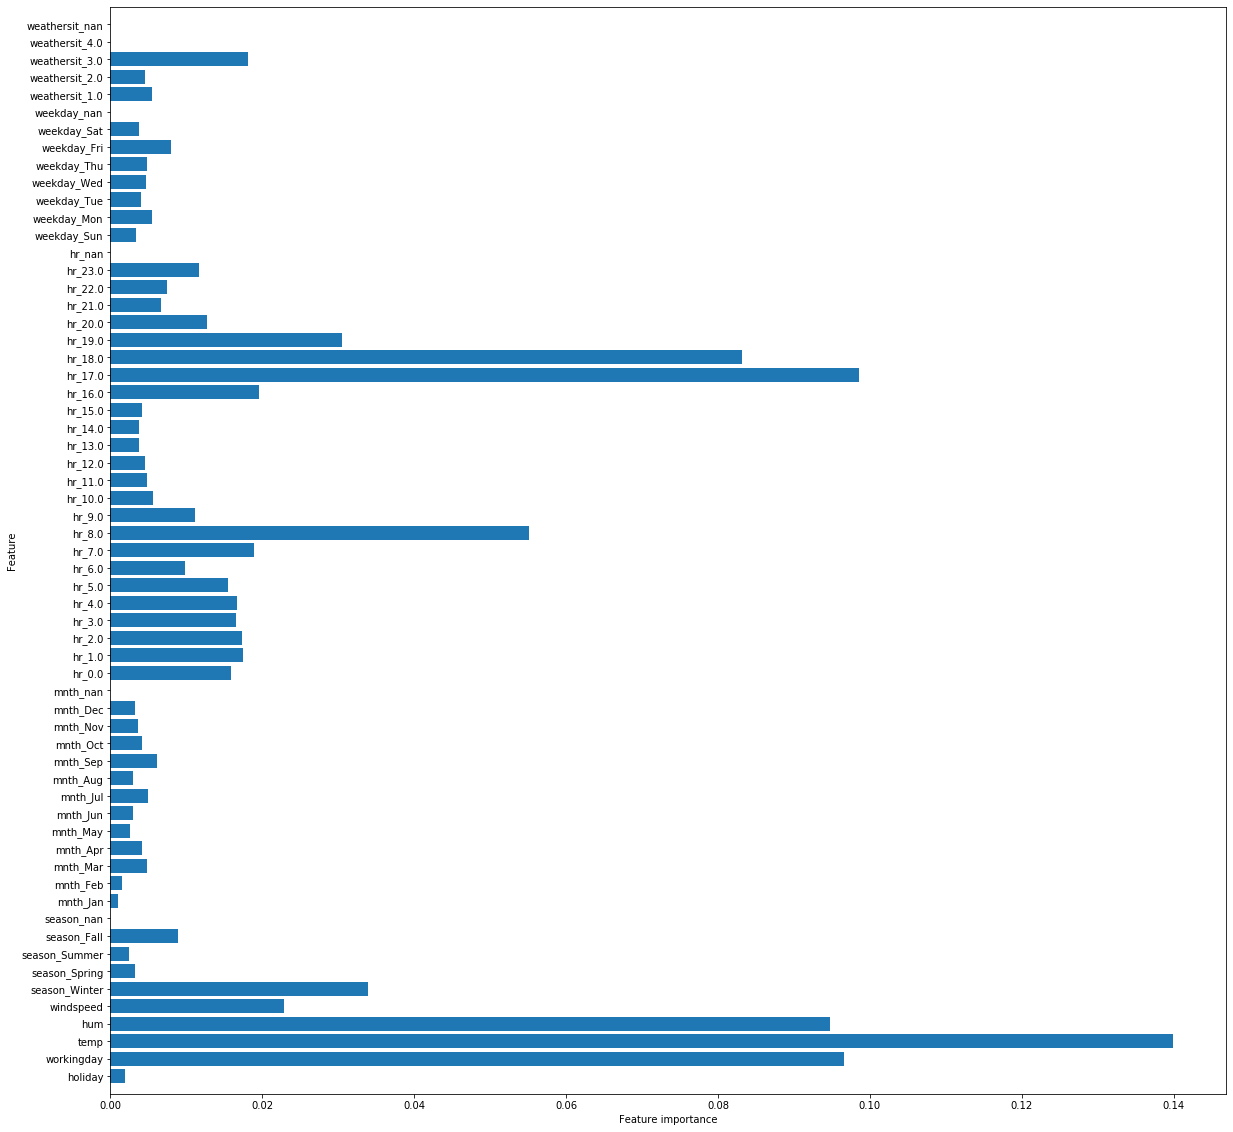

In [55]:
target = ["cnt"]

X = data.loc[:, ~data.columns.isin(target)]
y = data.loc[:, target]

from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor(random_state=0)
model.fit(X, y)

%matplotlib inline
def plot_feature_importances(model):
    plt.figure(figsize=(20,20))
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(model)

### Recursive Feature Selection (With Cross-Validation)

We will perform Recursive Feature Elimination to come up with the best features

In [56]:
from sklearn.feature_selection import RFECV

trans = RFECV(ExtraTreesRegressor(random_state=0, n_estimators=100))
X_trans = trans.fit_transform(X, y)
columns_retained_RFECV = X.iloc[:, :].columns[trans.get_support()].values

C:\Users\nkit0\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
columns_retained_RFECV

array(['workingday', 'temp', 'hum', 'windspeed', 'season_Winter',
       'season_Spring', 'season_Fall', 'mnth_Mar', 'mnth_Apr', 'mnth_Jul',
       'mnth_Sep', 'mnth_Oct', 'hr_0.0', 'hr_1.0', 'hr_2.0', 'hr_3.0',
       'hr_4.0', 'hr_5.0', 'hr_6.0', 'hr_7.0', 'hr_8.0', 'hr_9.0',
       'hr_10.0', 'hr_11.0', 'hr_12.0', 'hr_16.0', 'hr_17.0', 'hr_18.0',
       'hr_19.0', 'hr_20.0', 'hr_21.0', 'hr_22.0', 'hr_23.0',
       'weekday_Mon', 'weekday_Tue', 'weekday_Wed', 'weekday_Thu',
       'weekday_Fri', 'weekday_Sat', 'weathersit_1.0', 'weathersit_2.0',
       'weathersit_3.0'], dtype=object)

In [58]:
X = data.loc[:, data.columns.isin(columns_retained_RFECV)]

### Splitting the data into training-validation and test data sets

#### Data is already normalized, so we will simply create the training, validation and test splits

In [65]:
from sklearn.model_selection import train_test_split

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

### Stratified 5-folds Cross-Validation

We will be using Stratified 5-folds Cross-Validation such that each of our validation fold will have 20 % of the data

In [66]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

### Evaluation Strategy

We will evaluate the models based on the Mean Absolution Error (Deviation)

In [67]:
scoring = {'MAE': 'neg_mean_absolute_error'}

### Modeling

### Linear Regression (Ordinary Least Squares)

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

lreg = LinearRegression()
lreg.fit(X_trainval, y_trainval)

cv_result = cross_validate(lreg, X_trainval, y_trainval, cv=kfold, scoring=scoring, return_train_score=True)

print("Mean Train MAE: {:.4f}".format(np.mean(cv_result['train_MAE'])))
print("Mean Validation MAE: {:.4f}".format(np.mean(cv_result['test_MAE'])))

Mean Train MAE: -79.4113
Mean Validation MAE: -79.6671


#### Prediction on Test Data

In [72]:
from sklearn.metrics import mean_absolute_error

model = LinearRegression()
model.fit(X_trainval, y_trainval)

print("Test MAE: {:.4f}".format(mean_absolute_error(y_test, model.predict(X_test))))

Test MAE: 80.2966


### Lasso Regression

In [73]:
from  sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(Lasso(), param_grid, cv=kfold, return_train_score=True, scoring=scoring, refit="MAE", n_jobs=-1)
grid_search.fit(X_trainval, y_trainval)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit='MAE', return_train_score=True,
             scoring={'MAE': 'neg_mean_absolute_error'}, verbose=0)

In [74]:
print("Best parameters: {}".format(grid_search.best_params_))

print("Best Mean Train MAE: {:.4f}".format(grid_search.cv_results_['mean_train_MAE'][grid_search.best_index_]))
print("Best Mean Validation MAE: {:.4f}".format(grid_search.cv_results_['mean_test_MAE'][grid_search.best_index_]))

results = pd.DataFrame(grid_search.cv_results_)
display(results)

Best parameters: {'alpha': 0.1}
Best Mean Train MAE: -79.3694
Best Mean Validation MAE: -79.6131


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_MAE,split1_test_MAE,split2_test_MAE,split3_test_MAE,...,mean_test_MAE,std_test_MAE,rank_test_MAE,split0_train_MAE,split1_train_MAE,split2_train_MAE,split3_train_MAE,split4_train_MAE,mean_train_MAE,std_train_MAE
0,2.044043,0.021280,0.003205,0.000755,0.001,{'alpha': 0.001},-79.704345,-78.558374,-78.921746,-81.757883,...,-79.665161,1.116962,3,-79.384233,-79.614746,-79.597135,-78.751977,-79.709491,-79.411516,0.346491
1,0.306601,0.156651,0.004589,0.000798,0.01,{'alpha': 0.01},-79.689868,-78.548577,-78.919287,-81.740723,...,-79.652731,1.113630,2,-79.377558,-79.603589,-79.584733,-78.742935,-79.698183,-79.401400,0.345461
2,0.122272,0.015312,0.004226,0.000398,0.1,{'alpha': 0.1},-79.567642,-78.528907,-79.006666,-81.698128,...,-79.613083,1.096765,1,-79.353120,-79.568704,-79.541986,-78.722045,-79.660985,-79.369368,0.338781
3,0.085377,0.017970,0.004897,0.000673,1,{'alpha': 1},-80.718142,-81.296277,-81.798669,-83.884621,...,-81.724385,1.140895,4,-81.627890,-81.705948,-81.568202,-80.880840,-81.868562,-81.530289,0.340009
4,0.070530,0.006866,0.006072,0.003018,10,{'alpha': 10},-131.274221,-133.363757,-132.985609,-134.494724,...,-132.443686,1.562493,5,-133.313051,-132.506497,-131.946010,-131.646462,-132.668982,-132.416200,0.581372
5,0.035571,0.001628,0.005200,0.000752,100,{'alpha': 100},-140.824268,-142.776782,-142.971444,-144.529526,...,-142.171776,1.685947,6,-142.490247,-142.127533,-141.896837,-141.537424,-142.791336,-142.168676,0.439359


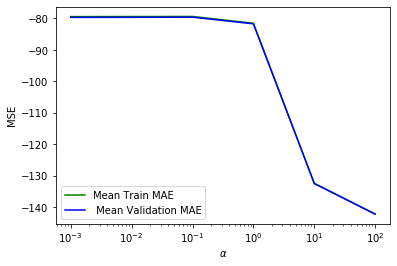

In [75]:
%matplotlib inline

x_axis = [0.001, 0.01, 0.1, 1, 10, 100]
plt.plot(x_axis, grid_search.cv_results_['mean_train_MAE'], c = 'g', label = 'Mean Train MAE')
plt.plot(x_axis, grid_search.cv_results_['mean_test_MAE'], c = 'b', label = ' Mean Validation MAE')
plt.legend()
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel('MSE')
plt.show()

#### Prediction on the test set

In [76]:
from sklearn.metrics import mean_absolute_error

model = Lasso(alpha=0.1)
model.fit(X_trainval, y_trainval)

print("Test MAE: {:.4f}".format(mean_absolute_error(y_test, model.predict(X_test))))

Test MAE: 80.1515


### Ridge Regression

In [77]:
from  sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(Ridge(), param_grid, cv=kfold, return_train_score=True, scoring=scoring, refit='MAE', n_jobs=-1)
grid_search.fit(X_trainval, y_trainval)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit='MAE', return_train_score=True,
             scoring={'MAE': 'neg_mean_absolute_error'}, verbose=0)

In [78]:
print("Best parameters: {}".format(grid_search.best_params_))

print("Best Mean Train MAE: {:.4f}".format(grid_search.cv_results_['mean_train_MAE'][grid_search.best_index_]))
print("Best Mean Validation MAE: {:.4f}".format(grid_search.cv_results_['mean_test_MAE'][grid_search.best_index_]))

results = pd.DataFrame(grid_search.cv_results_)
display(results)

Best parameters: {'alpha': 10}
Best Mean Train MAE: -79.3728
Best Mean Validation MAE: -79.6123


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_MAE,split1_test_MAE,split2_test_MAE,split3_test_MAE,...,mean_test_MAE,std_test_MAE,rank_test_MAE,split0_train_MAE,split1_train_MAE,split2_train_MAE,split3_train_MAE,split4_train_MAE,mean_train_MAE,std_train_MAE
0,0.049667,0.019477,0.003192,3.990412e-04,0.001,{'alpha': 0.001},-79.706249,-78.562793,-78.921920,-81.759693,...,-79.667035,1.116702,5,-79.384248,-79.616355,-79.597972,-78.752370,-79.705408,-79.411271,0.345923
1,0.025731,0.009171,0.002992,1.168008e-07,0.01,{'alpha': 0.01},-79.706054,-78.562614,-78.921855,-81.759567,...,-79.666901,1.116703,4,-79.384192,-79.616222,-79.597873,-78.752298,-79.705510,-79.411219,0.345942
2,0.021144,0.002631,0.008776,1.109548e-02,0.1,{'alpha': 0.1},-79.704104,-78.560983,-78.921204,-81.758292,...,-79.665571,1.116678,3,-79.383639,-79.614906,-79.596874,-78.751567,-79.706044,-79.410606,0.346057
3,0.023737,0.001465,0.003590,4.885783e-04,1,{'alpha': 1},-79.685309,-78.551453,-78.915384,-81.746697,...,-79.653672,1.115568,2,-79.377609,-79.603009,-79.587156,-78.744235,-79.699686,-79.402339,0.345414
4,0.021343,0.002055,0.005585,4.703059e-03,10,{'alpha': 10},-79.572573,-78.567145,-78.931685,-81.694381,...,-79.612284,1.094760,1,-79.367439,-79.564231,-79.553876,-78.721709,-79.656643,-79.372780,0.338806
5,0.022739,0.004694,0.003391,7.982254e-04,100,{'alpha': 100},-80.954011,-81.019926,-81.301766,-83.604537,...,-81.567442,1.026556,6,-81.452482,-81.494569,-81.467350,-80.716088,-81.612687,-81.348635,0.321252
6,0.024933,0.007569,0.003390,1.016710e-03,1000,{'alpha': 1000},-105.212691,-107.561010,-107.089293,-109.037142,...,-106.802305,1.485838,7,-107.081244,-106.652975,-106.501675,-106.010097,-107.082422,-106.665683,0.400803


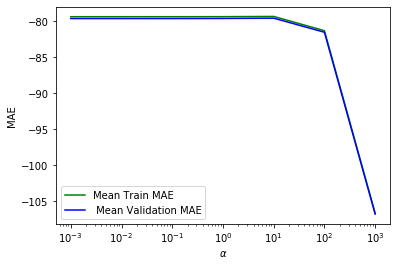

In [79]:
%matplotlib inline

x_axis = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
plt.plot(x_axis, grid_search.cv_results_['mean_train_MAE'], c = 'g', label = 'Mean Train MAE')
plt.plot(x_axis, grid_search.cv_results_['mean_test_MAE'], c = 'b', label = ' Mean Validation MAE')
plt.legend()
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel('MAE')
plt.show()

#### Prediction on the test set

In [80]:
from sklearn.metrics import mean_absolute_error

model = Ridge(alpha=1)
model.fit(X_trainval, y_trainval)

print("Test MAE: {:.4f}".format(mean_absolute_error(y_test, model.predict(X_test))))

Test MAE: 80.2843


### Linear Support Vector Regressor

In [81]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C' : [0.01, 0.1, 1, 10, 100, 1000, 10000]}

grid_search = GridSearchCV(LinearSVR(max_iter = 100000), param_grid, cv=kfold, return_train_score=True, scoring=scoring, refit='MAE', n_jobs=-1)
grid_search.fit(X_trainval, y_trainval)

C:\Users\nkit0\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                 fit_intercept=True, intercept_scaling=1.0,
                                 loss='epsilon_insensitive', max_iter=100000,
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000, 10000]},
             pre_dispatch='2*n_jobs', refit='MAE', return_train_score=True,
             scoring={'MAE': 'neg_mean_absolute_error'}, verbose=0)

In [82]:
print("Best parameters: {}".format(grid_search.best_params_))

print("Best Mean Train MAE: {:.4f}".format(grid_search.cv_results_['mean_train_MAE'][grid_search.best_index_]))
print("Best Mean Validation MAE: {:.4f}".format(grid_search.cv_results_['mean_test_MAE'][grid_search.best_index_]))

results = pd.DataFrame(grid_search.cv_results_)
display(results)

Best parameters: {'C': 100}
Best Mean Train MAE: -77.2804
Best Mean Validation MAE: -77.7084


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_MAE,split1_test_MAE,split2_test_MAE,split3_test_MAE,...,mean_test_MAE,std_test_MAE,rank_test_MAE,split0_train_MAE,split1_train_MAE,split2_train_MAE,split3_train_MAE,split4_train_MAE,mean_train_MAE,std_train_MAE
0,0.043883,0.013632,0.005385,0.002325,0.01,{'C': 0.01},-138.950256,-138.162216,-140.681960,-140.149819,...,-139.187199,1.067407,7,-139.584480,-139.261741,-138.798460,-138.609615,-139.449024,-139.140664,0.375722
1,0.059442,0.021801,0.003590,0.001197,0.1,{'C': 0.1},-106.979415,-108.514550,-109.447248,-110.772680,...,-108.520444,1.481225,6,-108.770821,-108.237330,-108.207751,-107.645535,-108.773765,-108.327040,0.420293
2,0.047873,0.019886,0.003391,0.000490,1,{'C': 1},-80.249817,-80.605200,-80.757251,-83.150351,...,-80.869535,1.209838,5,-80.592802,-80.758537,-80.770598,-80.003745,-80.976614,-80.620459,0.331528
3,0.063833,0.016866,0.003787,0.000742,10,{'C': 10},-77.872477,-76.886262,-77.586086,-80.120587,...,-77.775258,1.280441,4,-77.315585,-77.625139,-77.379731,-76.756141,-77.712784,-77.357876,0.335183
4,0.236443,0.014523,0.003392,0.000488,100,{'C': 100},-77.923117,-76.717779,-77.511306,-80.073599,...,-77.708427,1.311358,1,-77.241174,-77.543980,-77.308636,-76.680417,-77.627981,-77.280438,0.332446
5,1.138341,0.080493,0.004014,0.001076,1000,{'C': 1000},-77.940484,-76.706255,-77.534851,-80.089361,...,-77.716375,1.319839,2,-77.232100,-77.552508,-77.304943,-76.674223,-77.629645,-77.278684,0.336567
6,6.904378,1.565368,0.002404,0.001002,10000,{'C': 10000},-77.958004,-76.707775,-77.518191,-80.109673,...,-77.722260,1.326579,3,-77.232830,-77.547191,-77.305378,-76.674972,-77.624533,-77.276981,0.334358


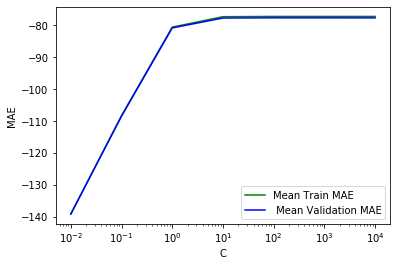

In [83]:
%matplotlib inline

x_axis = [0.01, 0.1, 1, 10, 100, 1000, 10000]
plt.plot(x_axis, grid_search.cv_results_['mean_train_MAE'], c = 'g', label = 'Mean Train MAE')
plt.plot(x_axis, grid_search.cv_results_['mean_test_MAE'], c = 'b', label = ' Mean Validation MAE')
plt.legend()
plt.xscale('log')
plt.xlabel(r'C')
plt.ylabel('MAE')
plt.show()

#### Prediction on the test set

In [84]:
from sklearn.metrics import mean_absolute_error

model = LinearSVR(max_iter = 100000, C=1000)
model.fit(X_trainval, y_trainval)

print("Test MAE: {:.4f}".format(mean_absolute_error(y_test, model.predict(X_test))))

C:\Users\nkit0\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test MAE: 78.2784


### Kernelized (RBF) Support Vector Regression

In [85]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C' : [0.01, 0.1, 1, 10], 
              'gamma' : [0.01, 0.1, 1, 10],
              'kernel' : ['rbf']}

grid_search = GridSearchCV(SVR(), param_grid, cv=kfold, return_train_score=True, scoring=scoring, refit='MAE', n_jobs=-1)
grid_search.fit(X_trainval, y_trainval)

C:\Users\nkit0\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit='MAE', return_train_score=True,
             scoring={'MAE': 'neg_mean_absolute_error'}, verbose=0)

In [86]:
print("Best parameters: {}".format(grid_search.best_params_))

print("Best Mean Train MAE: {:.4f}".format(grid_search.cv_results_['mean_train_MAE'][grid_search.best_index_]))
print("Best Mean Validation MAE: {:.4f}".format(grid_search.cv_results_['mean_test_MAE'][grid_search.best_index_]))

results = pd.DataFrame(grid_search.cv_results_)
display(results)

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Mean Train MAE: -70.7679
Best Mean Validation MAE: -71.7213


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_MAE,split1_test_MAE,...,mean_test_MAE,std_test_MAE,rank_test_MAE,split0_train_MAE,split1_train_MAE,split2_train_MAE,split3_train_MAE,split4_train_MAE,mean_train_MAE,std_train_MAE
0,25.908127,0.165017,3.814202,0.227855,0.01,0.01,rbf,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}",-136.096686,-136.841963,...,-137.229534,1.524274,15,-137.501101,-137.316084,-136.897798,-136.673868,-137.703989,-137.218568,0.380673
1,24.363411,1.353928,4.135338,0.255377,0.01,0.1,rbf,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}",-135.609952,-136.362734,...,-136.752991,1.522684,12,-137.026574,-136.836515,-136.417021,-136.190138,-137.213729,-136.736795,0.380124
2,22.341974,0.105524,3.987524,0.245339,0.01,1,rbf,"{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",-136.054519,-136.799367,...,-137.186213,1.524433,14,-137.449046,-137.264283,-136.845394,-136.621984,-137.652754,-137.166692,0.380905
3,26.486385,0.405495,3.746357,0.025726,0.01,10,rbf,"{'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}",-136.177313,-136.922337,...,-137.308376,1.525055,16,-137.568782,-137.384789,-136.966653,-136.743524,-137.775210,-137.287792,0.380867
4,22.656130,0.519906,3.814272,0.066731,0.1,0.01,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",-135.222465,-135.981419,...,-136.374591,1.521181,11,-136.649602,-136.455122,-136.037079,-135.806754,-136.825562,-136.354824,0.379445
5,22.969814,0.952803,3.769013,0.151117,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",-130.734745,-131.603164,...,-131.996611,1.523397,8,-132.293493,-132.016593,-131.629578,-131.374807,-132.356204,-131.934135,0.379390
6,21.359788,1.436117,3.876602,0.273913,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",-134.815006,-135.568877,...,-135.958308,1.524601,10,-136.143243,-135.948553,-135.528696,-135.302558,-136.329037,-135.850417,0.381604
7,24.881622,0.306710,4.085601,0.294056,0.1,10,rbf,"{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}",-136.018341,-136.763293,...,-137.147153,1.525229,13,-137.319077,-137.134022,-136.717044,-136.494082,-137.527392,-137.038323,0.381206
8,22.058059,0.347114,3.968280,0.155341,1,0.01,rbf,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",-127.547541,-128.508909,...,-128.878487,1.517414,7,-129.194679,-128.844687,-128.524136,-128.223001,-129.197383,-128.796777,0.380699
9,22.638474,0.761536,3.897920,0.137256,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",-102.735485,-104.449883,...,-104.433984,1.536751,4,-104.558622,-104.142444,-103.956272,-103.536531,-104.534483,-104.145670,0.381743


#### Predicting on the test set

In [87]:
from sklearn.metrics import mean_absolute_error

model = SVR(C = 10, gamma=0.1, kernel = 'rbf')
model.fit(X_trainval, y_trainval)

print("Test MAE: {:.4f}".format(mean_absolute_error(y_test, model.predict(X_test))))

C:\Users\nkit0\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test MAE: 70.9009


### Gradient Boosting Regressor

In [88]:
from  sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': range(30, 100),
             'learning_rate': [0.5, 1, 10, 20, 50],
             'loss': ['ls', 'lad', 'huber', 'quantile']}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=0), param_grid, cv=kfold, return_train_score=True, scoring=scoring, refit='MAE', n_jobs=-1)
grid_search.fit(X_trainval, y_trainval)

C:\Users\nkit0\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:788: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,
C:\Users\nkit0\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_we...
                                                 presort='deprecated',
                                          

In [89]:
print("Best parameters: {}".format(grid_search.best_params_))

print("Best Mean Train MAE: {:.4f}".format(grid_search.cv_results_['mean_train_MAE'][grid_search.best_index_]))
print("Best Mean Validation MAE: {:.4f}".format(grid_search.cv_results_['mean_test_MAE'][grid_search.best_index_]))

results = pd.DataFrame(grid_search.cv_results_)
display(results)

Best parameters: {'learning_rate': 0.5, 'loss': 'ls', 'n_estimators': 99}
Best Mean Train MAE: -50.6328
Best Mean Validation MAE: -53.9287


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_loss,param_n_estimators,params,split0_test_MAE,split1_test_MAE,...,mean_test_MAE,std_test_MAE,rank_test_MAE,split0_train_MAE,split1_train_MAE,split2_train_MAE,split3_train_MAE,split4_train_MAE,mean_train_MAE,std_train_MAE
0,0.870512,0.054280,0.012917,0.008089,0.5,ls,30,"{'learning_rate': 0.5, 'loss': 'ls', 'n_estima...",-6.346625e+01,-6.202331e+01,...,-6.289164e+01,0.542203,400,-6.218362e+01,-6.123377e+01,-6.126437e+01,-6.088064e+01,-6.188042e+01,-6.148857e+01,0.473585
1,0.904916,0.062253,0.008810,0.004259,0.5,ls,31,"{'learning_rate': 0.5, 'loss': 'ls', 'n_estima...",-6.346561e+01,-6.185468e+01,...,-6.275664e+01,0.607692,399,-6.209782e+01,-6.111140e+01,-6.117596e+01,-6.074402e+01,-6.159285e+01,-6.134441e+01,0.463138
2,0.922559,0.024692,0.015799,0.009736,0.5,ls,32,"{'learning_rate': 0.5, 'loss': 'ls', 'n_estima...",-6.283323e+01,-6.176229e+01,...,-6.248214e+01,0.446030,394,-6.160558e+01,-6.090931e+01,-6.096777e+01,-6.037053e+01,-6.142411e+01,-6.105546e+01,0.432832
3,0.951479,0.043145,0.006785,0.000753,0.5,ls,33,"{'learning_rate': 0.5, 'loss': 'ls', 'n_estima...",-6.254834e+01,-6.167249e+01,...,-6.230553e+01,0.356705,391,-6.127668e+01,-6.076058e+01,-6.079301e+01,-5.991577e+01,-6.129256e+01,-6.080772e+01,0.500599
4,0.957837,0.027980,0.008700,0.004218,0.5,ls,34,"{'learning_rate': 0.5, 'loss': 'ls', 'n_estima...",-6.252062e+01,-6.150349e+01,...,-6.187462e+01,0.425210,384,-6.119453e+01,-6.058492e+01,-6.005128e+01,-5.954115e+01,-6.077224e+01,-6.042882e+01,0.576039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,2.248725,0.147354,0.012402,0.005204,50,quantile,95,"{'learning_rate': 50, 'loss': 'quantile', 'n_e...",-3.420174e+162,-3.459895e+162,...,-3.450281e+162,inf,1388,-3.407219e+162,-3.510564e+162,-3.556006e+162,-3.386407e+162,-3.387160e+162,-3.449471e+162,inf
1396,2.375115,0.126653,0.009193,0.001938,50,quantile,96,"{'learning_rate': 50, 'loss': 'quantile', 'n_e...",-1.675885e+164,-1.695349e+164,...,-1.690638e+164,inf,1391,-1.669537e+164,-1.720176e+164,-1.742443e+164,-1.659339e+164,-1.659708e+164,-1.690241e+164,inf
1397,2.290755,0.096324,0.011602,0.004318,50,quantile,97,"{'learning_rate': 50, 'loss': 'quantile', 'n_e...",-8.211837e+165,-8.307208e+165,...,-8.284125e+165,inf,1394,-8.180733e+165,-8.428863e+165,-8.537970e+165,-8.130763e+165,-8.132571e+165,-8.282180e+165,inf
1398,2.367567,0.131896,0.008395,0.001019,50,quantile,98,"{'learning_rate': 50, 'loss': 'quantile', 'n_e...",-4.023800e+167,-4.070532e+167,...,-4.059221e+167,inf,1397,-4.008559e+167,-4.130143e+167,-4.183605e+167,-3.984074e+167,-3.984960e+167,-4.058268e+167,inf


#### Predicting on the test set

In [90]:
from sklearn.metrics import mean_absolute_error

model = GradientBoostingRegressor(random_state=0, learning_rate=0.5, loss='huber', n_estimators=99)
model.fit(X_trainval, y_trainval)

print("Test MAE: {:.4f}".format(mean_absolute_error(y_test, model.predict(X_test))))

C:\Users\nkit0\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test MAE: 54.1597


### XGBoost Regressor

In [91]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [1200],
             'max_depth': [3, 5, 7],
             'learning_rate': [0.01, 0.05, 0.1],
             'objective': ['reg:squarederror'],
             'early_stopping_rounds': [3, 5, 7],
             'subsample': [0.8, 0.9, 1],
             'colsample_bytree': [0.8],
             'gamma': [0, 1, 5]}

grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=kfold, return_train_score=True, scoring=scoring, refit='MAE', n_jobs=-1)
grid_search.fit(X_trainval, y_trainval)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    object...
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.8],
                         'early_stopping_rounds': [3, 5, 7], 'gamma': [0, 1, 5],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'n_estimators': [1200],
                         'objective': ['

In [92]:
print("Best parameters: {}".format(grid_search.best_params_))

print("Best Mean Train MAE: {:.4f}".format(grid_search.cv_results_['mean_train_MAE'][grid_search.best_index_]))
print("Best Mean Validation MAE: {:.4f}".format(grid_search.cv_results_['mean_test_MAE'][grid_search.best_index_]))

results = pd.DataFrame(grid_search.cv_results_)
display(results)

Best parameters: {'colsample_bytree': 0.8, 'early_stopping_rounds': 3, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 1200, 'objective': 'reg:squarederror', 'subsample': 0.9}
Best Mean Train MAE: -16.3733
Best Mean Validation MAE: -46.0702


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_early_stopping_rounds,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,...,mean_test_MAE,std_test_MAE,rank_test_MAE,split0_train_MAE,split1_train_MAE,split2_train_MAE,split3_train_MAE,split4_train_MAE,mean_train_MAE,std_train_MAE
0,52.223038,1.323533,0.161974,0.025106,0.8,3,0,0.01,3,1200,...,-64.000237,0.695959,217,-62.776048,-62.631583,-62.784061,-62.442283,-63.086057,-62.744006,0.211332
1,53.115186,1.707113,0.158485,0.015329,0.8,3,0,0.01,3,1200,...,-64.425909,0.814241,226,-63.104096,-63.067299,-63.184345,-63.073074,-63.558338,-63.197430,0.185222
2,54.920537,1.693703,0.182518,0.022072,0.8,3,0,0.01,3,1200,...,-65.470120,0.785497,235,-64.446407,-64.425605,-64.349773,-64.023578,-64.584661,-64.366005,0.187268
3,75.576251,1.634249,0.338101,0.044335,0.8,3,0,0.01,5,1200,...,-54.146855,0.527776,184,-49.560492,-49.504149,-49.765218,-49.492692,-50.149342,-49.694378,0.247709
4,73.081621,1.496832,0.349470,0.066232,0.8,3,0,0.01,5,1200,...,-54.575881,0.735468,196,-50.026954,-49.974325,-50.037183,-50.248710,-50.563842,-50.170203,0.218036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,83.996170,13.150631,0.421346,0.101522,0.8,7,5,0.1,5,1200,...,-47.140843,0.417707,49,-24.417374,-24.689134,-24.803769,-24.657773,-24.600009,-24.633612,0.126892
239,74.095874,9.466491,0.405123,0.071994,0.8,7,5,0.1,5,1200,...,-47.173012,0.144898,52,-30.227983,-29.943187,-30.019453,-29.450585,-30.363867,-30.001015,0.312996
240,119.407110,13.970113,0.725355,0.194441,0.8,7,5,0.1,7,1200,...,-47.313712,0.372216,82,-8.373667,-8.235320,-8.421234,-8.341387,-8.287813,-8.331884,0.064940
241,121.894782,16.507874,1.027325,0.343815,0.8,7,5,0.1,7,1200,...,-47.271541,0.267750,70,-8.185589,-8.119719,-8.300885,-8.176207,-8.173594,-8.191199,0.059509


#### Predicting on the test set

In [93]:
from sklearn.metrics import mean_absolute_error

model = XGBRegressor(learning_rate=0.05, max_depth=7, n_estimators=1200, objective = 'reg:squarederror', early_stopping_rounds = 3, subsample = 0.9,  gamma = 5, colsample_bytree = 0.8, random_state=0, n_jobs=-1)
model.fit(X_trainval, y_trainval)

print("Test MAE: {:.4f}".format(mean_absolute_error(y_test, model.predict(X_test))))

Test MAE: 46.3983


### Random Forest Regressor

In [94]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

param_grid = {
                'bootstrap': [True],
                'max_depth': [80, 90, 100, 110],
                'max_features': [2, 3],
                'min_samples_leaf': [3, 4, 5],
                'min_samples_split': [8, 10, 12],
                'n_estimators': [100, 200, 300, 1000]
            }

grid_search = GridSearchCV(RandomForestRegressor(random_state=0), param_grid, cv=kfold, return_train_score=True, scoring=scoring, refit='MAE', n_jobs=-1)
grid_search.fit(X_trainval, y_trainval)

C:\Users\nkit0\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n...
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
 

In [95]:
print("Best parameters: {}".format(grid_search.best_params_))

print("Best Mean Train MAE: {:.4f}".format(grid_search.cv_results_['mean_train_MAE'][grid_search.best_index_]))
print("Best Mean Validation MAE: {:.4f}".format(grid_search.cv_results_['mean_test_MAE'][grid_search.best_index_]))

results = pd.DataFrame(grid_search.cv_results_)
display(results)

Best parameters: {'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}
Best Mean Train MAE: -57.9350
Best Mean Validation MAE: -65.4434


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,mean_test_MAE,std_test_MAE,rank_test_MAE,split0_train_MAE,split1_train_MAE,split2_train_MAE,split3_train_MAE,split4_train_MAE,mean_train_MAE,std_train_MAE
0,1.873373,0.325626,0.118788,0.016501,True,80,2,3,8,100,...,-71.421176,0.649446,145,-65.319235,-64.649537,-64.840482,-63.750606,-64.550375,-64.622047,0.509723
1,3.653136,0.743959,0.210353,0.047496,True,80,2,3,8,200,...,-71.503202,0.774904,149,-64.828037,-64.320072,-65.079516,-64.290507,-64.977654,-64.699157,0.331525
2,5.415934,1.165370,0.360498,0.201400,True,80,2,3,8,300,...,-71.706764,0.730016,153,-64.906873,-64.615874,-65.091934,-64.347036,-65.075367,-64.807417,0.286803
3,21.981956,3.549267,1.055778,0.198661,True,80,2,3,8,1000,...,-71.725434,0.847813,157,-64.866763,-64.880723,-65.005997,-64.533772,-64.881996,-64.833850,0.158291
4,1.542060,0.062324,0.082013,0.006100,True,80,2,3,10,100,...,-72.392263,1.088882,189,-65.631746,-66.360480,-65.769680,-65.650339,-65.901644,-65.862778,0.266980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,17.562372,0.432446,0.898516,0.150952,True,110,3,5,10,1000,...,-69.816095,0.847461,97,-64.859579,-64.910734,-65.424507,-64.671745,-65.284734,-65.030260,0.280050
284,1.805301,0.151887,0.110114,0.016313,True,110,3,5,12,100,...,-70.658273,0.942044,133,-65.764021,-65.698248,-66.516202,-65.529013,-66.169542,-65.935405,0.358585
285,3.488384,0.139467,0.177804,0.012136,True,110,3,5,12,200,...,-70.085651,0.942271,121,-65.220980,-65.022892,-65.887292,-65.084945,-65.758421,-65.394906,0.357577
286,5.407641,0.441459,0.283243,0.039938,True,110,3,5,12,300,...,-69.863207,0.878212,105,-64.928723,-65.091305,-65.602777,-64.783055,-65.443407,-65.169853,0.308604


#### Predicting on the test set

In [96]:
from sklearn.metrics import mean_absolute_error

model = RandomForestRegressor(random_state=0, n_jobs=-1, bootstrap = True, max_depth = 80, max_features = 3, min_samples_leaf = 3, min_samples_split = 8, n_estimators = 200)
model.fit(X_trainval, y_trainval)

print("Test MAE: {:.4f}".format(mean_absolute_error(y_test, model.predict(X_test))))

C:\Users\nkit0\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Test MAE: 65.6133


### Ensemble Method - Voting Regressor
We will train the model using a voting regressor comprising of Gradient Boosting Regressor and XGBoost Regressor (using best hyper-parameters)

In [97]:
from sklearn.ensemble import VotingRegressor
from  sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import cross_validate

model1 = GradientBoostingRegressor(random_state=0, learning_rate=0.5, loss='huber', n_estimators=99)
model2 = XGBRegressor(learning_rate=0.05, max_depth=7, n_estimators=1200, objective = 'reg:squarederror', early_stopping_rounds = 3, subsample = 0.9,  gamma = 5, colsample_bytree = 0.8, random_state=0, n_jobs=-1)

model = VotingRegressor(estimators=[('gb', model1), ('xgb', model2)])
model.fit(X_trainval, y_trainval)

scores = cross_validate(model, X_trainval, y_trainval, scoring=scoring, cv=kfold, return_train_score=True)

C:\Users\nkit0\Anaconda3\lib\site-packages\sklearn\ensemble\_voting.py:406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nkit0\Anaconda3\lib\site-packages\sklearn\ensemble\_voting.py:406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nkit0\Anaconda3\lib\site-packages\sklearn\ensemble\_voting.py:406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nkit0\Anaconda3\lib\site-packages\sklearn\ensemble\_voting.py:406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [98]:
print("Best Mean Train MAE: {:.4f}".format(np.mean(scores['train_MAE'])))
print("Best Mean Validation MAE: {:.4f}".format(np.mean(scores['test_MAE'])))

Best Mean Train MAE: -32.0373
Best Mean Validation MAE: -47.9575


#### Predicting on the test set

In [99]:
from sklearn.metrics import mean_absolute_error

print("Test MAE: {:.4f}".format(mean_absolute_error(y_test, model.predict(X_test))))

Test MAE: 48.2238


### Ensemble Method - Stacking Regressor

Stacking regressor consisting of Random Forest, XGBoost and Gradient Boosting Regressor

In [100]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from  sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import cross_validate


model1 = RandomForestRegressor(random_state=0, n_jobs=-1, bootstrap = True, max_depth = 80, max_features = 3, min_samples_leaf = 3, min_samples_split = 8, n_estimators = 200)
model2 = GradientBoostingRegressor(random_state=0, learning_rate=0.5, loss='huber', n_estimators=99)
model3 = XGBRegressor(learning_rate=0.05, max_depth=7, n_estimators=1200, objective = 'reg:squarederror', early_stopping_rounds = 3, subsample = 0.9,  gamma = 5, colsample_bytree = 0.8, random_state=0, n_jobs=-1)



estimators = [('rf', model1), ('xgb', model2)]

model = StackingRegressor(estimators=estimators, final_estimator=model3)
model.fit(X_trainval, y_trainval)

scores = cross_validate(model, X_trainval, y_trainval, scoring=scoring, cv=kfold, return_train_score=True)

C:\Users\nkit0\Anaconda3\lib\site-packages\sklearn\ensemble\_stacking.py:642: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nkit0\Anaconda3\lib\site-packages\sklearn\ensemble\_stacking.py:642: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nkit0\Anaconda3\lib\site-packages\sklearn\ensemble\_stacking.py:642: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nkit0\Anaconda3\lib\site-packages\sklearn\ensemble\_stacking.py:642: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

In [101]:
print("Best Mean Train MAE: {:.4f}".format(np.mean(scores['train_MAE'])))
print("Best Mean Validation MAE: {:.4f}".format(np.mean(scores['test_MAE'])))

Best Mean Train MAE: -50.6158
Best Mean Validation MAE: -55.7221


#### Predicting on the test set

In [102]:
from sklearn.metrics import mean_absolute_error

print("Test MAE: {:.4f}".format(mean_absolute_error(y_test, model.predict(X_test))))

Test MAE: 54.5251
